In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

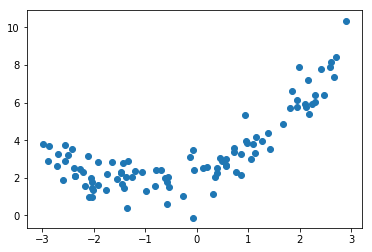

In [80]:
m = 100
x = 6 * np.random.rand(m, 1) -3
y = .5 * x**2 + x + 2 + np.random.randn(m, 1) *.8

plt.scatter(x, y)

In [81]:
def polynom(m, deg):
    nm = np.zeros((m.shape[0], deg+1))
    for j in range(0, deg+1):
        for i in range(0, m.shape[0]):
            nm[i][j] = m[i]**j
    return nm

In [162]:
def learning_schedule(t):
    return 5 / (t + 50)

def SGD(X, y, n_epoch, eta):
    theta = np.random.rand(X.shape[1], 1)
    m = len(X)
    for epoch in range(n_epoch):
        for n in range(m):
            rand = np.random.randint(0,m-1)
            xi, yi = X[rand:rand+1], y[rand:rand+1]
            grad = xi.T @ ((xi @ theta) - yi)
            eta = learning_schedule(epoch * m + n)
            theta = theta - grad * eta
    return theta

theta = SGD(polynom(x, 2), y, 50, 0.001)
theta_1 = SGD(polynom(x, 1), y, 50, 0.001)

theta

array([[ 2.1666655 ],
       [ 0.97369057],
       [ 0.49296049]])

In [163]:
def BGD(X, y, n_epoch, eta):
    theta = np.random.rand(X.shape[1], 1)
    m = len(X)
    for i in range(n_epoch):
        gradients = 2/m * X.T @ ((X @ theta) - y)
        theta = theta - eta * gradients
    return theta

theta_BGD = BGD(polynom(x, 2), y, 50, 0.001)

print(theta_BGD)

[[ 0.62276229]
 [ 0.77005187]
 [ 0.79880145]]


In [164]:
def MiniBGD(X, y, n_epoch, eta, batch_size):
    theta = np.random.rand(X.shape[1], 1)
    m = len(X)
    for epoch in range(n_epoch):
        shuffled = np.random.permutation(m)
        X_shuff, y_shuff = X[shuffled], y[shuffled]
        for i in range(0, m, batch_size):
            xi, yi = X_shuff[i:i+batch_size], y_shuff[i:i+batch_size]
            gradients = 2/m * xi.T @ ((xi @ theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
    return theta

theta_MiniBGD = MiniBGD(polynom(x, 2), y, 50, 0.001, 32)

theta_MiniBGD    

array([[ 0.85934713],
       [ 0.9760418 ],
       [ 0.73573096]])

In [83]:
theta_8 = np.linalg.inv(eight.T @ eight) @ eight.T @ y

theta_100 = np.linalg.inv(onehun.T @ onehun) @ onehun.T @ y

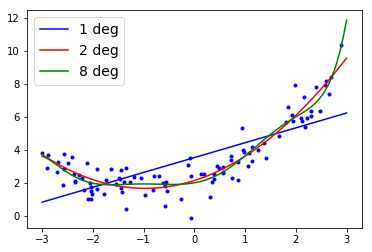

In [166]:
plt.plot(x, y, 'b.')
t = np.linspace(-3, 3, 100).reshape(100, 1)

# Need to add intercespt point

theta_1 = SGD(polynom(x, 1), y, 50, 0.001)
theta = SGD(polynom(x, 2), y, 50, 0.001)

eight = polynom(t, 8)
theta_8 = np.linalg.inv(eight.T @ eight) @ eight.T @ y

plt.plot(t, polynom(t, 1) @ theta_1, 'b-', label='1 deg')
plt.plot(t, polynom(t, 2) @ theta, 'r-', label='2 deg')
plt.plot(t, polynom(t, 8) @ theta_8, 'g-', label='8 deg')
plt.legend(loc="upper left", fontsize=14)
plt.show()

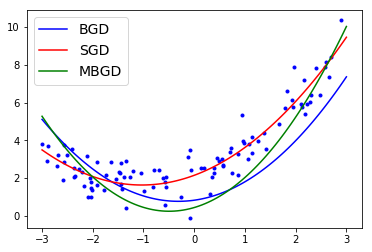

In [173]:
plt.plot(x, y, 'b.')

theta_SGD = SGD(polynom(x, 2), y, 50, 0.001)
theta_BGD = BGD(polynom(x, 2), y, 50, 0.001)
theta_MiniBGD = MiniBGD(polynom(x, 2), y, 50, 0.1, 32)

plt.plot(t, polynom(t, 2) @ theta_BGD, 'b-', label='BGD')
plt.plot(t, polynom(t, 2) @ theta_SGD, 'r-', label='SGD')
plt.plot(t, polynom(t, 2) @ theta_MiniBGD, 'g-', label='MBGD')
plt.legend(loc="upper left", fontsize=14)
plt.show()